# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem definiton
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart-disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci?select=HeartDiseaseTrain-Test.csv

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the  heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [3]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

### Load data

In [4]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to found out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

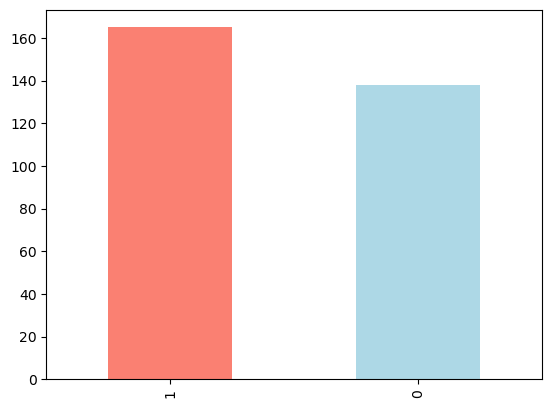

In [7]:
df['target'].value_counts().plot(kind='bar', 
                                 color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


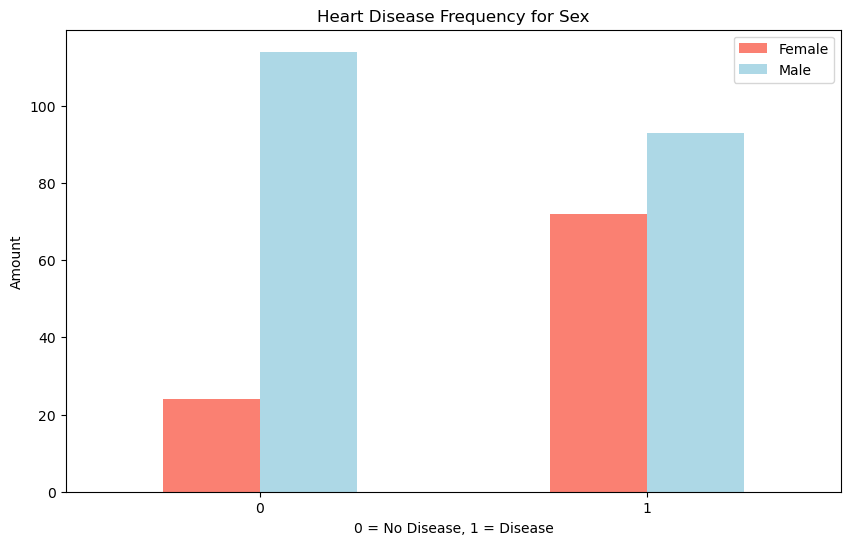

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

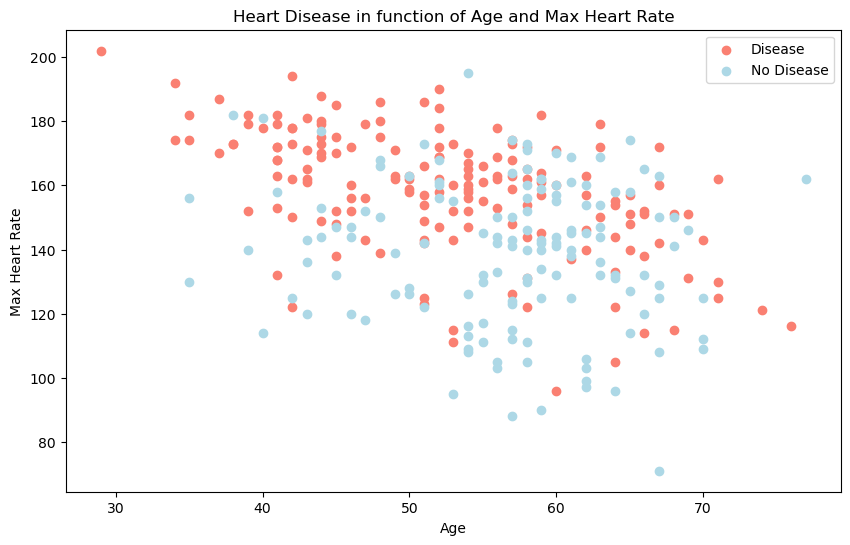

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

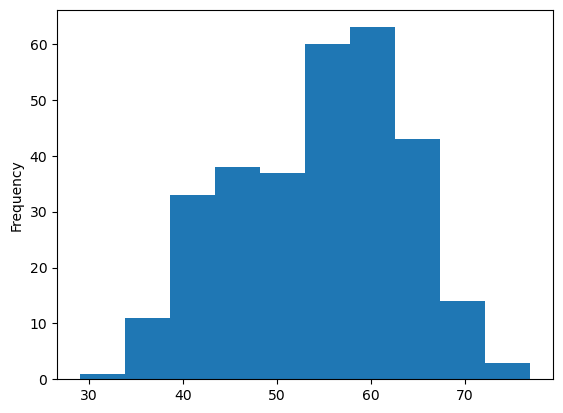

In [17]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


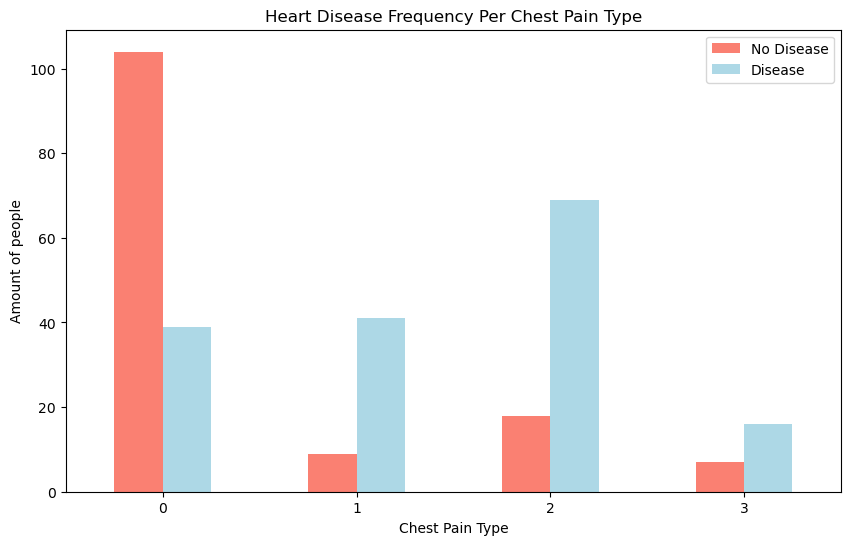

In [19]:
# MAke the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue']);
# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount of people')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


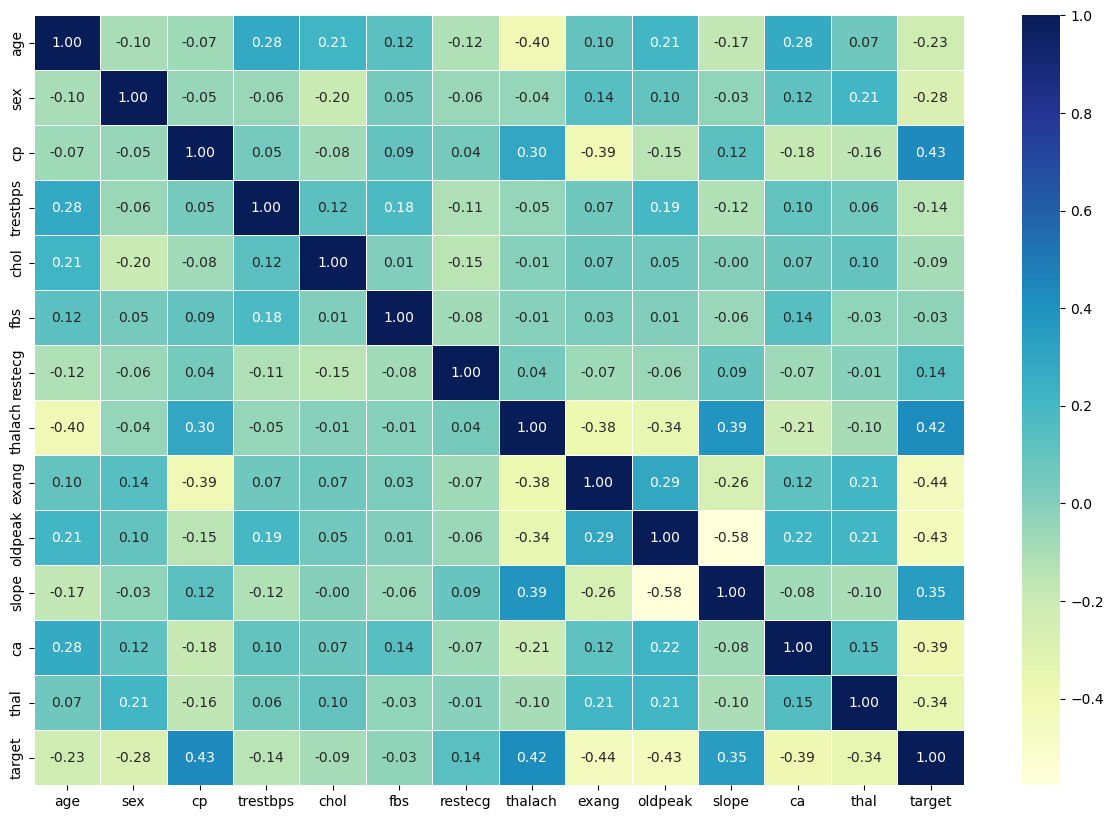

In [21]:
# Let's make our correlation matrix a littile prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

# Use this if some of the graph gets cutoff
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

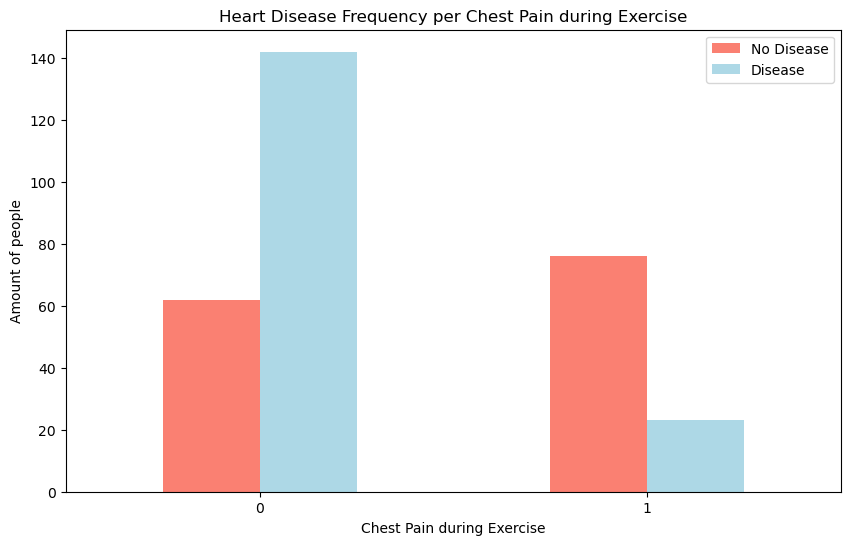

In [22]:
pd.crosstab(df.exang, df.target).plot(kind='bar',
                                      figsize=(10,6),
                                      color=['salmon', 'lightblue']);

plt.title('Heart Disease Frequency per Chest Pain during Exercise')
plt.xlabel('Chest Pain during Exercise')
plt.ylabel('Amount of people')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

## 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [25]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine leraning model

We'll train it (find the patterns) on the training set

And we'll test it (use the patterns) on the test set

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Calssifier
3. Random Forest Classifier

In [28]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict o different Scikit'Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    '''
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [29]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\Kypri\OneDrive\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

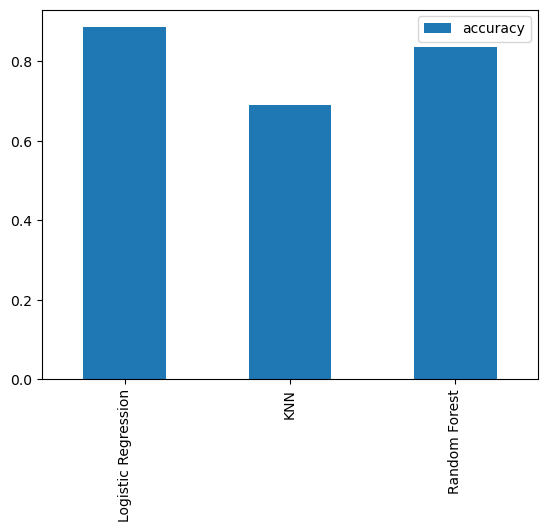

In [30]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off.
What should we do?

Let's look at the following
* Hyperparameter tuning
* Fetaure importance
* Confusion Matrix
* Cross-validation
* Presicion
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [31]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1 ,21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


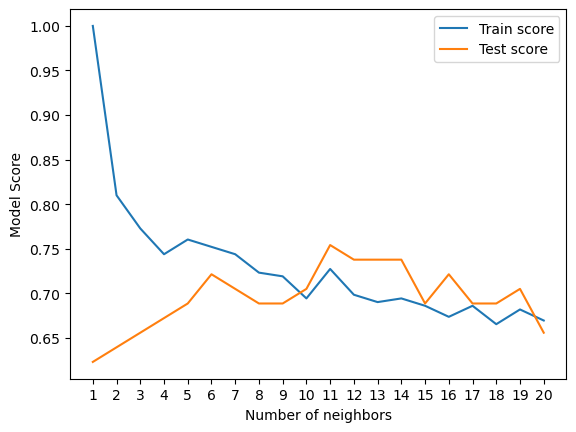

In [34]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSeachCV

In [35]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [36]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                log_reg_grid, 
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [40]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rf = RandomizedSearchCV(RandomForestClassifier(),
                        rf_grid,
                        cv=5,
                        n_iter=50,
                        verbose=True)

# Fit it
rf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [42]:
# Evaluate the RandomizedSearchCV RandomForestClassifier
rf.score(X_test, y_test)

0.8688524590163934

Tune Hyperparameters by these 3 steps:
    
1. by hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [122]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear'],
                'penalty': ['l1', 'l2'],
                'max_iter': [100, 200, 300],
                'class_weight': [None, 'balanced']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameters search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [123]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [124]:
# Evaluate the grid search LogisticRegeression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate out trained model, first we need to make predictions

In [117]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

In [118]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [119]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

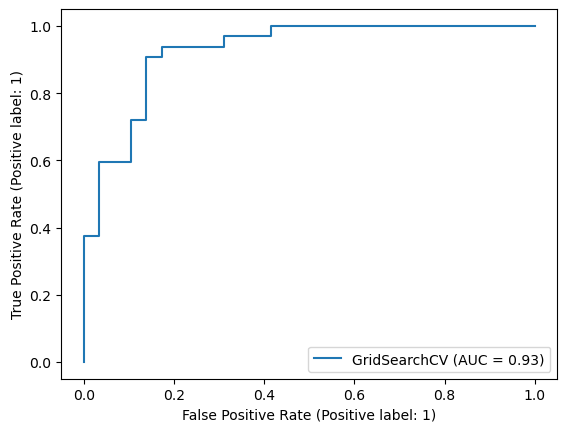

In [121]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

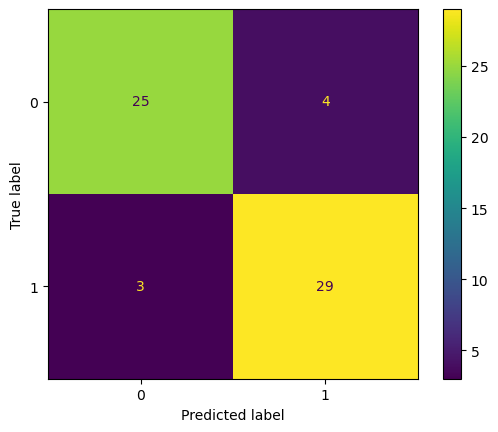

In [125]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [126]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'. 

In [128]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [129]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [132]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [134]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [136]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)

cv_precision

0.8207936507936507

In [137]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)

cv_recall

0.9212121212121213

In [140]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)

cv_f1

0.8673007976269721

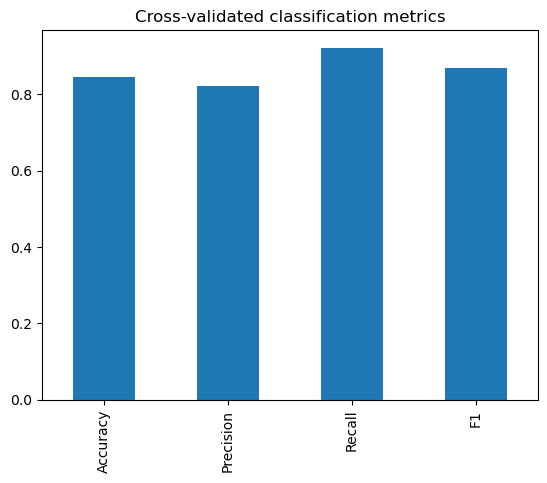

In [144]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

### Feature Importance

Feature importance is another way as asking, 'which features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for '(MODEL NAME) feature importance'.

Let's find the feature importance for our LogisticRegression model...

In [148]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [149]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [150]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

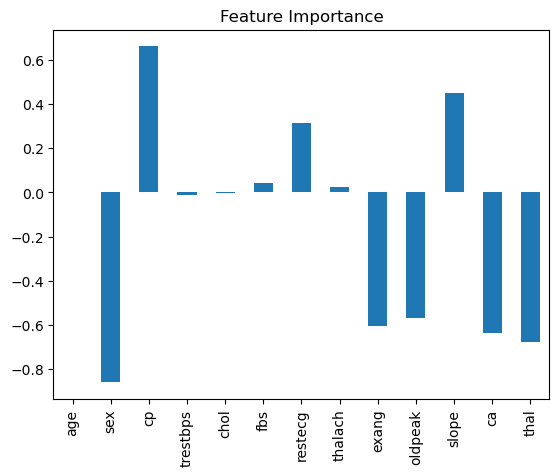

In [155]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', 
                      legend=False);

In [156]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [157]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?


In [1]:
# Let's try CatBoost to beat 0.885 from LogisticRegression() accuracy score
!pip install catboost
import catboost

  Using cached catboost-1.2-cp311-cp311-win_amd64.whl (101.0 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
                                              0.0/15.6 MB ? eta -:--:--
                                              0.1/15.6 MB 1.7 MB/s eta 0:00:10
                                              0.2/15.6 MB 2.8 MB/s eta 0:00:06
                                              0.3/15.6 MB 3.0 MB/s eta 0:00:06
     -                                        0.5/15.6 MB 2.7 MB/s eta 0:00:06
     -                                        0.7/15.6 MB 3.2 MB/s eta 0:00:05
     -                                        0.7/15.6 MB 3.2 MB/s eta 0:00:05
     --                                       1.0/15.6 MB 3.1 MB/s eta 0:00:05
     ---                                      1.3/15.6 MB 3.6 MB/s eta 0:00:05
     ---                                      1.5/15.6 MB 3.6 MB/s eta 0:00:04
     ----                                     1.6/15.6 MB 3.5 MB/s eta 0:00:04
     ----        

In [45]:
from catboost import CatBoostClassifier

In [32]:
model_cat = CatBoostClassifier(depth=6,
                               l2_leaf_reg=1,
                               learning_rate=None,
                               random_strength=2,
                               iterations=4000)
model_cat.fit(X_train,y_train)

0:	learn: 0.6684652	total: 6.42ms	remaining: 25.7s
1:	learn: 0.6551241	total: 10.3ms	remaining: 20.6s
2:	learn: 0.6420155	total: 13.5ms	remaining: 18s
3:	learn: 0.6252752	total: 16.7ms	remaining: 16.7s
4:	learn: 0.6118390	total: 21.4ms	remaining: 17.1s
5:	learn: 0.5941100	total: 24.5ms	remaining: 16.3s
6:	learn: 0.5851707	total: 27.6ms	remaining: 15.7s
7:	learn: 0.5661263	total: 30.8ms	remaining: 15.4s
8:	learn: 0.5492755	total: 33.4ms	remaining: 14.8s
9:	learn: 0.5392838	total: 36.2ms	remaining: 14.4s
10:	learn: 0.5232960	total: 39ms	remaining: 14.1s
11:	learn: 0.5143301	total: 41.8ms	remaining: 13.9s
12:	learn: 0.5037178	total: 45ms	remaining: 13.8s
13:	learn: 0.4938743	total: 47.9ms	remaining: 13.6s
14:	learn: 0.4877168	total: 50.9ms	remaining: 13.5s
15:	learn: 0.4717363	total: 54ms	remaining: 13.5s
16:	learn: 0.4592439	total: 57.2ms	remaining: 13.4s
17:	learn: 0.4508814	total: 60.2ms	remaining: 13.3s
18:	learn: 0.4366721	total: 63.5ms	remaining: 13.3s
19:	learn: 0.4327592	total: 66

225:	learn: 0.0678178	total: 596ms	remaining: 9.95s
226:	learn: 0.0672168	total: 599ms	remaining: 9.95s
227:	learn: 0.0666508	total: 601ms	remaining: 9.94s
228:	learn: 0.0660225	total: 603ms	remaining: 9.93s
229:	learn: 0.0656265	total: 606ms	remaining: 9.93s
230:	learn: 0.0649447	total: 608ms	remaining: 9.93s
231:	learn: 0.0645568	total: 611ms	remaining: 9.92s
232:	learn: 0.0639542	total: 613ms	remaining: 9.91s
233:	learn: 0.0635857	total: 616ms	remaining: 9.91s
234:	learn: 0.0631617	total: 618ms	remaining: 9.91s
235:	learn: 0.0626564	total: 621ms	remaining: 9.91s
236:	learn: 0.0619502	total: 624ms	remaining: 9.91s
237:	learn: 0.0612888	total: 627ms	remaining: 9.91s
238:	learn: 0.0608063	total: 629ms	remaining: 9.9s
239:	learn: 0.0605636	total: 632ms	remaining: 9.9s
240:	learn: 0.0602993	total: 634ms	remaining: 9.89s
241:	learn: 0.0598939	total: 637ms	remaining: 9.9s
242:	learn: 0.0596205	total: 640ms	remaining: 9.9s
243:	learn: 0.0588350	total: 643ms	remaining: 9.89s
244:	learn: 0.05

434:	learn: 0.0165361	total: 1.18s	remaining: 9.69s
435:	learn: 0.0164561	total: 1.19s	remaining: 9.7s
436:	learn: 0.0163912	total: 1.19s	remaining: 9.7s
437:	learn: 0.0163073	total: 1.19s	remaining: 9.7s
438:	learn: 0.0162387	total: 1.2s	remaining: 9.7s
439:	learn: 0.0161492	total: 1.2s	remaining: 9.71s
440:	learn: 0.0160819	total: 1.2s	remaining: 9.7s
441:	learn: 0.0160250	total: 1.21s	remaining: 9.7s
442:	learn: 0.0159559	total: 1.21s	remaining: 9.7s
443:	learn: 0.0158836	total: 1.21s	remaining: 9.69s
444:	learn: 0.0157640	total: 1.21s	remaining: 9.7s
445:	learn: 0.0156976	total: 1.22s	remaining: 9.7s
446:	learn: 0.0156199	total: 1.22s	remaining: 9.69s
447:	learn: 0.0155489	total: 1.22s	remaining: 9.69s
448:	learn: 0.0154982	total: 1.22s	remaining: 9.69s
449:	learn: 0.0154276	total: 1.23s	remaining: 9.69s
450:	learn: 0.0153588	total: 1.23s	remaining: 9.68s
451:	learn: 0.0152910	total: 1.23s	remaining: 9.68s
452:	learn: 0.0151887	total: 1.24s	remaining: 9.67s
453:	learn: 0.0150979	to

671:	learn: 0.0070009	total: 1.77s	remaining: 8.75s
672:	learn: 0.0069820	total: 1.77s	remaining: 8.75s
673:	learn: 0.0069650	total: 1.77s	remaining: 8.75s
674:	learn: 0.0069465	total: 1.77s	remaining: 8.75s
675:	learn: 0.0069246	total: 1.78s	remaining: 8.74s
676:	learn: 0.0069062	total: 1.78s	remaining: 8.74s
677:	learn: 0.0068879	total: 1.78s	remaining: 8.74s
678:	learn: 0.0068694	total: 1.78s	remaining: 8.73s
679:	learn: 0.0068394	total: 1.79s	remaining: 8.73s
680:	learn: 0.0068141	total: 1.79s	remaining: 8.72s
681:	learn: 0.0067993	total: 1.79s	remaining: 8.72s
682:	learn: 0.0067830	total: 1.79s	remaining: 8.72s
683:	learn: 0.0067499	total: 1.8s	remaining: 8.72s
684:	learn: 0.0067292	total: 1.8s	remaining: 8.71s
685:	learn: 0.0067119	total: 1.8s	remaining: 8.71s
686:	learn: 0.0066878	total: 1.8s	remaining: 8.71s
687:	learn: 0.0066675	total: 1.81s	remaining: 8.7s
688:	learn: 0.0066511	total: 1.81s	remaining: 8.7s
689:	learn: 0.0066354	total: 1.81s	remaining: 8.7s
690:	learn: 0.00661

889:	learn: 0.0042565	total: 2.35s	remaining: 8.22s
890:	learn: 0.0042564	total: 2.36s	remaining: 8.22s
891:	learn: 0.0042564	total: 2.36s	remaining: 8.21s
892:	learn: 0.0042486	total: 2.36s	remaining: 8.21s
893:	learn: 0.0042441	total: 2.36s	remaining: 8.21s
894:	learn: 0.0042393	total: 2.37s	remaining: 8.21s
895:	learn: 0.0042344	total: 2.37s	remaining: 8.2s
896:	learn: 0.0042262	total: 2.37s	remaining: 8.2s
897:	learn: 0.0042123	total: 2.37s	remaining: 8.2s
898:	learn: 0.0042122	total: 2.38s	remaining: 8.19s
899:	learn: 0.0042123	total: 2.38s	remaining: 8.19s
900:	learn: 0.0042123	total: 2.38s	remaining: 8.18s
901:	learn: 0.0042079	total: 2.38s	remaining: 8.18s
902:	learn: 0.0041991	total: 2.38s	remaining: 8.18s
903:	learn: 0.0041928	total: 2.39s	remaining: 8.18s
904:	learn: 0.0041852	total: 2.39s	remaining: 8.17s
905:	learn: 0.0041786	total: 2.39s	remaining: 8.17s
906:	learn: 0.0041707	total: 2.39s	remaining: 8.16s
907:	learn: 0.0041669	total: 2.4s	remaining: 8.16s
908:	learn: 0.00

1055:	learn: 0.0033699	total: 2.74s	remaining: 7.65s
1056:	learn: 0.0033644	total: 2.75s	remaining: 7.64s
1057:	learn: 0.0033584	total: 2.75s	remaining: 7.64s
1058:	learn: 0.0033583	total: 2.75s	remaining: 7.64s
1059:	learn: 0.0033583	total: 2.75s	remaining: 7.63s
1060:	learn: 0.0033519	total: 2.75s	remaining: 7.63s
1061:	learn: 0.0033464	total: 2.76s	remaining: 7.63s
1062:	learn: 0.0033403	total: 2.76s	remaining: 7.63s
1063:	learn: 0.0033403	total: 2.76s	remaining: 7.62s
1064:	learn: 0.0033403	total: 2.76s	remaining: 7.62s
1065:	learn: 0.0033347	total: 2.77s	remaining: 7.61s
1066:	learn: 0.0033289	total: 2.77s	remaining: 7.61s
1067:	learn: 0.0033224	total: 2.77s	remaining: 7.61s
1068:	learn: 0.0033173	total: 2.77s	remaining: 7.61s
1069:	learn: 0.0033091	total: 2.78s	remaining: 7.61s
1070:	learn: 0.0033090	total: 2.78s	remaining: 7.6s
1071:	learn: 0.0033045	total: 2.78s	remaining: 7.6s
1072:	learn: 0.0032994	total: 2.79s	remaining: 7.6s
1073:	learn: 0.0032922	total: 2.79s	remaining: 7.

1226:	learn: 0.0028646	total: 3.13s	remaining: 7.08s
1227:	learn: 0.0028646	total: 3.13s	remaining: 7.07s
1228:	learn: 0.0028646	total: 3.14s	remaining: 7.07s
1229:	learn: 0.0028646	total: 3.14s	remaining: 7.07s
1230:	learn: 0.0028646	total: 3.14s	remaining: 7.07s
1231:	learn: 0.0028645	total: 3.14s	remaining: 7.06s
1232:	learn: 0.0028645	total: 3.15s	remaining: 7.06s
1233:	learn: 0.0028645	total: 3.15s	remaining: 7.06s
1234:	learn: 0.0028645	total: 3.15s	remaining: 7.05s
1235:	learn: 0.0028603	total: 3.15s	remaining: 7.05s
1236:	learn: 0.0028566	total: 3.16s	remaining: 7.05s
1237:	learn: 0.0028566	total: 3.16s	remaining: 7.04s
1238:	learn: 0.0028539	total: 3.16s	remaining: 7.04s
1239:	learn: 0.0028539	total: 3.16s	remaining: 7.04s
1240:	learn: 0.0028539	total: 3.16s	remaining: 7.04s
1241:	learn: 0.0028505	total: 3.17s	remaining: 7.03s
1242:	learn: 0.0028458	total: 3.17s	remaining: 7.03s
1243:	learn: 0.0028407	total: 3.17s	remaining: 7.03s
1244:	learn: 0.0028407	total: 3.17s	remaining:

1391:	learn: 0.0026018	total: 3.52s	remaining: 6.59s
1392:	learn: 0.0026018	total: 3.52s	remaining: 6.6s
1393:	learn: 0.0026018	total: 3.53s	remaining: 6.59s
1394:	learn: 0.0026018	total: 3.53s	remaining: 6.59s
1395:	learn: 0.0026018	total: 3.53s	remaining: 6.59s
1396:	learn: 0.0026018	total: 3.54s	remaining: 6.59s
1397:	learn: 0.0026018	total: 3.54s	remaining: 6.59s
1398:	learn: 0.0025975	total: 3.54s	remaining: 6.59s
1399:	learn: 0.0025974	total: 3.54s	remaining: 6.58s
1400:	learn: 0.0025974	total: 3.55s	remaining: 6.58s
1401:	learn: 0.0025908	total: 3.55s	remaining: 6.58s
1402:	learn: 0.0025908	total: 3.56s	remaining: 6.58s
1403:	learn: 0.0025907	total: 3.56s	remaining: 6.58s
1404:	learn: 0.0025871	total: 3.56s	remaining: 6.58s
1405:	learn: 0.0025837	total: 3.57s	remaining: 6.58s
1406:	learn: 0.0025799	total: 3.57s	remaining: 6.58s
1407:	learn: 0.0025763	total: 3.57s	remaining: 6.58s
1408:	learn: 0.0025712	total: 3.58s	remaining: 6.58s
1409:	learn: 0.0025667	total: 3.58s	remaining: 

1601:	learn: 0.0023877	total: 4.09s	remaining: 6.12s
1602:	learn: 0.0023838	total: 4.09s	remaining: 6.12s
1603:	learn: 0.0023838	total: 4.09s	remaining: 6.12s
1604:	learn: 0.0023821	total: 4.1s	remaining: 6.11s
1605:	learn: 0.0023819	total: 4.1s	remaining: 6.11s
1606:	learn: 0.0023820	total: 4.1s	remaining: 6.11s
1607:	learn: 0.0023820	total: 4.1s	remaining: 6.1s
1608:	learn: 0.0023820	total: 4.11s	remaining: 6.1s
1609:	learn: 0.0023820	total: 4.11s	remaining: 6.1s
1610:	learn: 0.0023820	total: 4.11s	remaining: 6.09s
1611:	learn: 0.0023819	total: 4.11s	remaining: 6.09s
1612:	learn: 0.0023805	total: 4.11s	remaining: 6.09s
1613:	learn: 0.0023800	total: 4.12s	remaining: 6.09s
1614:	learn: 0.0023800	total: 4.12s	remaining: 6.08s
1615:	learn: 0.0023800	total: 4.12s	remaining: 6.08s
1616:	learn: 0.0023800	total: 4.12s	remaining: 6.08s
1617:	learn: 0.0023800	total: 4.13s	remaining: 6.07s
1618:	learn: 0.0023775	total: 4.13s	remaining: 6.07s
1619:	learn: 0.0023775	total: 4.13s	remaining: 6.07s


1785:	learn: 0.0022761	total: 4.46s	remaining: 5.53s
1786:	learn: 0.0022762	total: 4.46s	remaining: 5.53s
1787:	learn: 0.0022762	total: 4.47s	remaining: 5.53s
1788:	learn: 0.0022762	total: 4.47s	remaining: 5.52s
1789:	learn: 0.0022761	total: 4.47s	remaining: 5.52s
1790:	learn: 0.0022762	total: 4.47s	remaining: 5.52s
1791:	learn: 0.0022760	total: 4.47s	remaining: 5.51s
1792:	learn: 0.0022760	total: 4.48s	remaining: 5.51s
1793:	learn: 0.0022759	total: 4.48s	remaining: 5.51s
1794:	learn: 0.0022729	total: 4.48s	remaining: 5.5s
1795:	learn: 0.0022729	total: 4.48s	remaining: 5.5s
1796:	learn: 0.0022729	total: 4.48s	remaining: 5.5s
1797:	learn: 0.0022729	total: 4.49s	remaining: 5.49s
1798:	learn: 0.0022729	total: 4.49s	remaining: 5.49s
1799:	learn: 0.0022729	total: 4.49s	remaining: 5.49s
1800:	learn: 0.0022729	total: 4.49s	remaining: 5.48s
1801:	learn: 0.0022711	total: 4.49s	remaining: 5.48s
1802:	learn: 0.0022696	total: 4.5s	remaining: 5.48s
1803:	learn: 0.0022697	total: 4.5s	remaining: 5.47

1986:	learn: 0.0021953	total: 4.85s	remaining: 4.91s
1987:	learn: 0.0021953	total: 4.85s	remaining: 4.91s
1988:	learn: 0.0021952	total: 4.85s	remaining: 4.9s
1989:	learn: 0.0021953	total: 4.85s	remaining: 4.9s
1990:	learn: 0.0021953	total: 4.85s	remaining: 4.9s
1991:	learn: 0.0021952	total: 4.86s	remaining: 4.89s
1992:	learn: 0.0021935	total: 4.86s	remaining: 4.89s
1993:	learn: 0.0021934	total: 4.86s	remaining: 4.89s
1994:	learn: 0.0021935	total: 4.86s	remaining: 4.89s
1995:	learn: 0.0021934	total: 4.86s	remaining: 4.88s
1996:	learn: 0.0021934	total: 4.87s	remaining: 4.88s
1997:	learn: 0.0021902	total: 4.87s	remaining: 4.88s
1998:	learn: 0.0021885	total: 4.87s	remaining: 4.88s
1999:	learn: 0.0021886	total: 4.87s	remaining: 4.87s
2000:	learn: 0.0021886	total: 4.87s	remaining: 4.87s
2001:	learn: 0.0021886	total: 4.88s	remaining: 4.87s
2002:	learn: 0.0021868	total: 4.88s	remaining: 4.86s
2003:	learn: 0.0021868	total: 4.88s	remaining: 4.86s
2004:	learn: 0.0021867	total: 4.88s	remaining: 4.

2176:	learn: 0.0021261	total: 5.23s	remaining: 4.38s
2177:	learn: 0.0021260	total: 5.23s	remaining: 4.38s
2178:	learn: 0.0021260	total: 5.24s	remaining: 4.38s
2179:	learn: 0.0021260	total: 5.24s	remaining: 4.38s
2180:	learn: 0.0021259	total: 5.24s	remaining: 4.37s
2181:	learn: 0.0021259	total: 5.25s	remaining: 4.37s
2182:	learn: 0.0021260	total: 5.25s	remaining: 4.37s
2183:	learn: 0.0021260	total: 5.25s	remaining: 4.37s
2184:	learn: 0.0021260	total: 5.25s	remaining: 4.37s
2185:	learn: 0.0021260	total: 5.26s	remaining: 4.36s
2186:	learn: 0.0021260	total: 5.26s	remaining: 4.36s
2187:	learn: 0.0021259	total: 5.26s	remaining: 4.36s
2188:	learn: 0.0021259	total: 5.27s	remaining: 4.36s
2189:	learn: 0.0021259	total: 5.27s	remaining: 4.36s
2190:	learn: 0.0021260	total: 5.27s	remaining: 4.35s
2191:	learn: 0.0021259	total: 5.28s	remaining: 4.35s
2192:	learn: 0.0021259	total: 5.28s	remaining: 4.35s
2193:	learn: 0.0021259	total: 5.28s	remaining: 4.35s
2194:	learn: 0.0021259	total: 5.28s	remaining:

2376:	learn: 0.0020979	total: 5.8s	remaining: 3.96s
2377:	learn: 0.0020979	total: 5.8s	remaining: 3.96s
2378:	learn: 0.0020978	total: 5.8s	remaining: 3.95s
2379:	learn: 0.0020978	total: 5.81s	remaining: 3.95s
2380:	learn: 0.0020979	total: 5.81s	remaining: 3.95s
2381:	learn: 0.0020979	total: 5.81s	remaining: 3.95s
2382:	learn: 0.0020974	total: 5.81s	remaining: 3.94s
2383:	learn: 0.0020974	total: 5.82s	remaining: 3.94s
2384:	learn: 0.0020974	total: 5.82s	remaining: 3.94s
2385:	learn: 0.0020974	total: 5.82s	remaining: 3.94s
2386:	learn: 0.0020974	total: 5.83s	remaining: 3.94s
2387:	learn: 0.0020973	total: 5.83s	remaining: 3.93s
2388:	learn: 0.0020974	total: 5.83s	remaining: 3.93s
2389:	learn: 0.0020972	total: 5.83s	remaining: 3.93s
2390:	learn: 0.0020941	total: 5.83s	remaining: 3.93s
2391:	learn: 0.0020941	total: 5.84s	remaining: 3.92s
2392:	learn: 0.0020941	total: 5.84s	remaining: 3.92s
2393:	learn: 0.0020941	total: 5.84s	remaining: 3.92s
2394:	learn: 0.0020941	total: 5.84s	remaining: 3.

2562:	learn: 0.0020587	total: 6.19s	remaining: 3.47s
2563:	learn: 0.0020587	total: 6.19s	remaining: 3.47s
2564:	learn: 0.0020587	total: 6.19s	remaining: 3.46s
2565:	learn: 0.0020562	total: 6.2s	remaining: 3.46s
2566:	learn: 0.0020533	total: 6.2s	remaining: 3.46s
2567:	learn: 0.0020511	total: 6.2s	remaining: 3.46s
2568:	learn: 0.0020511	total: 6.2s	remaining: 3.46s
2569:	learn: 0.0020511	total: 6.21s	remaining: 3.45s
2570:	learn: 0.0020511	total: 6.21s	remaining: 3.45s
2571:	learn: 0.0020511	total: 6.21s	remaining: 3.45s
2572:	learn: 0.0020510	total: 6.21s	remaining: 3.44s
2573:	learn: 0.0020510	total: 6.21s	remaining: 3.44s
2574:	learn: 0.0020511	total: 6.22s	remaining: 3.44s
2575:	learn: 0.0020510	total: 6.22s	remaining: 3.44s
2576:	learn: 0.0020511	total: 6.22s	remaining: 3.44s
2577:	learn: 0.0020511	total: 6.22s	remaining: 3.43s
2578:	learn: 0.0020511	total: 6.23s	remaining: 3.43s
2579:	learn: 0.0020510	total: 6.23s	remaining: 3.43s
2580:	learn: 0.0020510	total: 6.23s	remaining: 3.4

2771:	learn: 0.0020216	total: 6.76s	remaining: 2.99s
2772:	learn: 0.0020216	total: 6.76s	remaining: 2.99s
2773:	learn: 0.0020216	total: 6.76s	remaining: 2.99s
2774:	learn: 0.0020216	total: 6.76s	remaining: 2.99s
2775:	learn: 0.0020216	total: 6.77s	remaining: 2.98s
2776:	learn: 0.0020215	total: 6.77s	remaining: 2.98s
2777:	learn: 0.0020216	total: 6.77s	remaining: 2.98s
2778:	learn: 0.0020216	total: 6.78s	remaining: 2.98s
2779:	learn: 0.0020215	total: 6.78s	remaining: 2.97s
2780:	learn: 0.0020215	total: 6.78s	remaining: 2.97s
2781:	learn: 0.0020214	total: 6.78s	remaining: 2.97s
2782:	learn: 0.0020215	total: 6.79s	remaining: 2.97s
2783:	learn: 0.0020215	total: 6.79s	remaining: 2.96s
2784:	learn: 0.0020215	total: 6.79s	remaining: 2.96s
2785:	learn: 0.0020215	total: 6.79s	remaining: 2.96s
2786:	learn: 0.0020214	total: 6.8s	remaining: 2.96s
2787:	learn: 0.0020214	total: 6.8s	remaining: 2.96s
2788:	learn: 0.0020213	total: 6.8s	remaining: 2.95s
2789:	learn: 0.0020213	total: 6.8s	remaining: 2.9

2940:	learn: 0.0019867	total: 7.14s	remaining: 2.57s
2941:	learn: 0.0019868	total: 7.14s	remaining: 2.57s
2942:	learn: 0.0019867	total: 7.14s	remaining: 2.56s
2943:	learn: 0.0019867	total: 7.14s	remaining: 2.56s
2944:	learn: 0.0019867	total: 7.14s	remaining: 2.56s
2945:	learn: 0.0019868	total: 7.15s	remaining: 2.56s
2946:	learn: 0.0019868	total: 7.15s	remaining: 2.55s
2947:	learn: 0.0019868	total: 7.15s	remaining: 2.55s
2948:	learn: 0.0019867	total: 7.15s	remaining: 2.55s
2949:	learn: 0.0019867	total: 7.15s	remaining: 2.55s
2950:	learn: 0.0019867	total: 7.16s	remaining: 2.54s
2951:	learn: 0.0019867	total: 7.16s	remaining: 2.54s
2952:	learn: 0.0019867	total: 7.16s	remaining: 2.54s
2953:	learn: 0.0019866	total: 7.16s	remaining: 2.54s
2954:	learn: 0.0019866	total: 7.17s	remaining: 2.53s
2955:	learn: 0.0019866	total: 7.17s	remaining: 2.53s
2956:	learn: 0.0019865	total: 7.17s	remaining: 2.53s
2957:	learn: 0.0019866	total: 7.17s	remaining: 2.53s
2958:	learn: 0.0019852	total: 7.17s	remaining:

3135:	learn: 0.0019731	total: 7.51s	remaining: 2.07s
3136:	learn: 0.0019731	total: 7.51s	remaining: 2.07s
3137:	learn: 0.0019731	total: 7.51s	remaining: 2.06s
3138:	learn: 0.0019732	total: 7.51s	remaining: 2.06s
3139:	learn: 0.0019731	total: 7.52s	remaining: 2.06s
3140:	learn: 0.0019732	total: 7.52s	remaining: 2.06s
3141:	learn: 0.0019731	total: 7.52s	remaining: 2.05s
3142:	learn: 0.0019730	total: 7.52s	remaining: 2.05s
3143:	learn: 0.0019731	total: 7.53s	remaining: 2.05s
3144:	learn: 0.0019731	total: 7.53s	remaining: 2.05s
3145:	learn: 0.0019731	total: 7.53s	remaining: 2.04s
3146:	learn: 0.0019730	total: 7.53s	remaining: 2.04s
3147:	learn: 0.0019730	total: 7.53s	remaining: 2.04s
3148:	learn: 0.0019730	total: 7.54s	remaining: 2.04s
3149:	learn: 0.0019730	total: 7.54s	remaining: 2.03s
3150:	learn: 0.0019730	total: 7.54s	remaining: 2.03s
3151:	learn: 0.0019728	total: 7.54s	remaining: 2.03s
3152:	learn: 0.0019728	total: 7.54s	remaining: 2.03s
3153:	learn: 0.0019729	total: 7.54s	remaining:

3332:	learn: 0.0019568	total: 7.9s	remaining: 1.58s
3333:	learn: 0.0019568	total: 7.9s	remaining: 1.58s
3334:	learn: 0.0019567	total: 7.9s	remaining: 1.57s
3335:	learn: 0.0019567	total: 7.9s	remaining: 1.57s
3336:	learn: 0.0019567	total: 7.9s	remaining: 1.57s
3337:	learn: 0.0019567	total: 7.91s	remaining: 1.57s
3338:	learn: 0.0019567	total: 7.91s	remaining: 1.56s
3339:	learn: 0.0019567	total: 7.91s	remaining: 1.56s
3340:	learn: 0.0019567	total: 7.91s	remaining: 1.56s
3341:	learn: 0.0019566	total: 7.92s	remaining: 1.56s
3342:	learn: 0.0019567	total: 7.92s	remaining: 1.56s
3343:	learn: 0.0019567	total: 7.92s	remaining: 1.55s
3344:	learn: 0.0019566	total: 7.92s	remaining: 1.55s
3345:	learn: 0.0019566	total: 7.92s	remaining: 1.55s
3346:	learn: 0.0019567	total: 7.93s	remaining: 1.55s
3347:	learn: 0.0019553	total: 7.93s	remaining: 1.54s
3348:	learn: 0.0019554	total: 7.93s	remaining: 1.54s
3349:	learn: 0.0019553	total: 7.93s	remaining: 1.54s
3350:	learn: 0.0019553	total: 7.94s	remaining: 1.54

3555:	learn: 0.0019332	total: 8.47s	remaining: 1.06s
3556:	learn: 0.0019333	total: 8.47s	remaining: 1.05s
3557:	learn: 0.0019332	total: 8.47s	remaining: 1.05s
3558:	learn: 0.0019333	total: 8.48s	remaining: 1.05s
3559:	learn: 0.0019333	total: 8.48s	remaining: 1.05s
3560:	learn: 0.0019333	total: 8.48s	remaining: 1.04s
3561:	learn: 0.0019332	total: 8.48s	remaining: 1.04s
3562:	learn: 0.0019333	total: 8.49s	remaining: 1.04s
3563:	learn: 0.0019321	total: 8.49s	remaining: 1.04s
3564:	learn: 0.0019322	total: 8.49s	remaining: 1.04s
3565:	learn: 0.0019321	total: 8.49s	remaining: 1.03s
3566:	learn: 0.0019320	total: 8.5s	remaining: 1.03s
3567:	learn: 0.0019321	total: 8.5s	remaining: 1.03s
3568:	learn: 0.0019321	total: 8.5s	remaining: 1.03s
3569:	learn: 0.0019321	total: 8.51s	remaining: 1.02s
3570:	learn: 0.0019321	total: 8.51s	remaining: 1.02s
3571:	learn: 0.0019321	total: 8.51s	remaining: 1.02s
3572:	learn: 0.0019321	total: 8.51s	remaining: 1.02s
3573:	learn: 0.0019320	total: 8.51s	remaining: 1.

3740:	learn: 0.0019173	total: 8.86s	remaining: 613ms
3741:	learn: 0.0019173	total: 8.86s	remaining: 611ms
3742:	learn: 0.0019174	total: 8.86s	remaining: 608ms
3743:	learn: 0.0019173	total: 8.86s	remaining: 606ms
3744:	learn: 0.0019173	total: 8.86s	remaining: 603ms
3745:	learn: 0.0019173	total: 8.86s	remaining: 601ms
3746:	learn: 0.0019173	total: 8.87s	remaining: 599ms
3747:	learn: 0.0019173	total: 8.87s	remaining: 596ms
3748:	learn: 0.0019173	total: 8.87s	remaining: 594ms
3749:	learn: 0.0019173	total: 8.87s	remaining: 591ms
3750:	learn: 0.0019173	total: 8.87s	remaining: 589ms
3751:	learn: 0.0019172	total: 8.88s	remaining: 587ms
3752:	learn: 0.0019173	total: 8.88s	remaining: 584ms
3753:	learn: 0.0019173	total: 8.88s	remaining: 582ms
3754:	learn: 0.0019173	total: 8.88s	remaining: 579ms
3755:	learn: 0.0019173	total: 8.88s	remaining: 577ms
3756:	learn: 0.0019165	total: 8.88s	remaining: 575ms
3757:	learn: 0.0019164	total: 8.89s	remaining: 572ms
3758:	learn: 0.0019165	total: 8.89s	remaining:

3966:	learn: 0.0019075	total: 9.42s	remaining: 78.4ms
3967:	learn: 0.0019074	total: 9.43s	remaining: 76ms
3968:	learn: 0.0019073	total: 9.43s	remaining: 73.6ms
3969:	learn: 0.0019073	total: 9.43s	remaining: 71.3ms
3970:	learn: 0.0019059	total: 9.43s	remaining: 68.9ms
3971:	learn: 0.0019059	total: 9.44s	remaining: 66.5ms
3972:	learn: 0.0019054	total: 9.44s	remaining: 64.1ms
3973:	learn: 0.0019055	total: 9.44s	remaining: 61.8ms
3974:	learn: 0.0019054	total: 9.44s	remaining: 59.4ms
3975:	learn: 0.0019054	total: 9.45s	remaining: 57ms
3976:	learn: 0.0019054	total: 9.45s	remaining: 54.6ms
3977:	learn: 0.0019054	total: 9.45s	remaining: 52.3ms
3978:	learn: 0.0019054	total: 9.45s	remaining: 49.9ms
3979:	learn: 0.0019054	total: 9.46s	remaining: 47.5ms
3980:	learn: 0.0019054	total: 9.46s	remaining: 45.1ms
3981:	learn: 0.0019054	total: 9.46s	remaining: 42.8ms
3982:	learn: 0.0019054	total: 9.46s	remaining: 40.4ms
3983:	learn: 0.0019054	total: 9.46s	remaining: 38ms
3984:	learn: 0.0019054	total: 9.47

In [33]:
model_cat.score(X_test,y_test)

0.819672131147541

In [46]:
## Let's try GridSearchCV
# Define the parameter grid to search over
param_grid = {'depth': [6, 7, 8],
              'l2_leaf_reg': [1, 2, 3],
              'random_strength': [2, 3],
              'iterations':[3000, 4000]
              # Add more hyperparameters to tune as needed
              }

grid_search = GridSearchCV(CatBoostClassifier(),
                           param_grid,
                           n_jobs=-1,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

0:	learn: 0.6707586	total: 137ms	remaining: 9m 6s
1:	learn: 0.6571047	total: 141ms	remaining: 4m 42s
2:	learn: 0.6463439	total: 144ms	remaining: 3m 12s
3:	learn: 0.6311706	total: 148ms	remaining: 2m 27s
4:	learn: 0.6176513	total: 151ms	remaining: 2m
5:	learn: 0.6067038	total: 155ms	remaining: 1m 43s
6:	learn: 0.5974289	total: 157ms	remaining: 1m 29s
7:	learn: 0.5821783	total: 160ms	remaining: 1m 20s
8:	learn: 0.5696857	total: 163ms	remaining: 1m 12s
9:	learn: 0.5570083	total: 167ms	remaining: 1m 6s
10:	learn: 0.5473418	total: 171ms	remaining: 1m 1s
11:	learn: 0.5355929	total: 174ms	remaining: 57.8s
12:	learn: 0.5255086	total: 177ms	remaining: 54.3s
13:	learn: 0.5152476	total: 183ms	remaining: 52.1s
14:	learn: 0.5037383	total: 187ms	remaining: 49.6s
15:	learn: 0.4966535	total: 192ms	remaining: 47.8s
16:	learn: 0.4892487	total: 194ms	remaining: 45.4s
17:	learn: 0.4783481	total: 197ms	remaining: 43.6s
18:	learn: 0.4719416	total: 200ms	remaining: 42s
19:	learn: 0.4602250	total: 204ms	remai

174:	learn: 0.1623889	total: 711ms	remaining: 15.5s
175:	learn: 0.1620101	total: 715ms	remaining: 15.5s
176:	learn: 0.1617839	total: 718ms	remaining: 15.5s
177:	learn: 0.1611890	total: 720ms	remaining: 15.5s
178:	learn: 0.1606651	total: 724ms	remaining: 15.4s
179:	learn: 0.1597080	total: 727ms	remaining: 15.4s
180:	learn: 0.1587819	total: 730ms	remaining: 15.4s
181:	learn: 0.1581180	total: 734ms	remaining: 15.4s
182:	learn: 0.1580589	total: 735ms	remaining: 15.3s
183:	learn: 0.1574228	total: 739ms	remaining: 15.3s
184:	learn: 0.1565847	total: 742ms	remaining: 15.3s
185:	learn: 0.1554639	total: 745ms	remaining: 15.3s
186:	learn: 0.1542988	total: 749ms	remaining: 15.3s
187:	learn: 0.1542716	total: 750ms	remaining: 15.2s
188:	learn: 0.1539220	total: 754ms	remaining: 15.2s
189:	learn: 0.1535828	total: 757ms	remaining: 15.2s
190:	learn: 0.1530283	total: 760ms	remaining: 15.2s
191:	learn: 0.1516202	total: 764ms	remaining: 15.1s
192:	learn: 0.1504281	total: 767ms	remaining: 15.1s
193:	learn: 

345:	learn: 0.0578668	total: 1.29s	remaining: 13.6s
346:	learn: 0.0575232	total: 1.29s	remaining: 13.6s
347:	learn: 0.0572489	total: 1.29s	remaining: 13.6s
348:	learn: 0.0569893	total: 1.3s	remaining: 13.6s
349:	learn: 0.0566981	total: 1.3s	remaining: 13.6s
350:	learn: 0.0564203	total: 1.31s	remaining: 13.6s
351:	learn: 0.0562618	total: 1.31s	remaining: 13.6s
352:	learn: 0.0560556	total: 1.31s	remaining: 13.6s
353:	learn: 0.0557257	total: 1.32s	remaining: 13.6s
354:	learn: 0.0554879	total: 1.32s	remaining: 13.6s
355:	learn: 0.0554160	total: 1.32s	remaining: 13.6s
356:	learn: 0.0551540	total: 1.33s	remaining: 13.5s
357:	learn: 0.0549074	total: 1.33s	remaining: 13.5s
358:	learn: 0.0546421	total: 1.33s	remaining: 13.5s
359:	learn: 0.0542615	total: 1.34s	remaining: 13.5s
360:	learn: 0.0539592	total: 1.34s	remaining: 13.5s
361:	learn: 0.0537061	total: 1.34s	remaining: 13.5s
362:	learn: 0.0535181	total: 1.35s	remaining: 13.5s
363:	learn: 0.0532517	total: 1.35s	remaining: 13.5s
364:	learn: 0.

506:	learn: 0.0293353	total: 1.86s	remaining: 12.8s
507:	learn: 0.0292202	total: 1.86s	remaining: 12.8s
508:	learn: 0.0291741	total: 1.86s	remaining: 12.8s
509:	learn: 0.0290872	total: 1.87s	remaining: 12.8s
510:	learn: 0.0289966	total: 1.87s	remaining: 12.8s
511:	learn: 0.0288913	total: 1.87s	remaining: 12.8s
512:	learn: 0.0288142	total: 1.88s	remaining: 12.8s
513:	learn: 0.0286922	total: 1.88s	remaining: 12.8s
514:	learn: 0.0285778	total: 1.88s	remaining: 12.8s
515:	learn: 0.0284973	total: 1.89s	remaining: 12.7s
516:	learn: 0.0284313	total: 1.89s	remaining: 12.7s
517:	learn: 0.0283213	total: 1.9s	remaining: 12.7s
518:	learn: 0.0282099	total: 1.9s	remaining: 12.7s
519:	learn: 0.0280701	total: 1.9s	remaining: 12.7s
520:	learn: 0.0279851	total: 1.91s	remaining: 12.7s
521:	learn: 0.0279066	total: 1.91s	remaining: 12.7s
522:	learn: 0.0278147	total: 1.91s	remaining: 12.7s
523:	learn: 0.0277181	total: 1.92s	remaining: 12.7s
524:	learn: 0.0276134	total: 1.92s	remaining: 12.7s
525:	learn: 0.0

690:	learn: 0.0177728	total: 2.59s	remaining: 12.4s
691:	learn: 0.0177279	total: 2.6s	remaining: 12.4s
692:	learn: 0.0176873	total: 2.6s	remaining: 12.4s
693:	learn: 0.0176654	total: 2.6s	remaining: 12.4s
694:	learn: 0.0176378	total: 2.61s	remaining: 12.4s
695:	learn: 0.0176204	total: 2.61s	remaining: 12.4s
696:	learn: 0.0175962	total: 2.63s	remaining: 12.5s
697:	learn: 0.0175677	total: 2.63s	remaining: 12.5s
698:	learn: 0.0175280	total: 2.64s	remaining: 12.5s
699:	learn: 0.0174850	total: 2.64s	remaining: 12.4s
700:	learn: 0.0174422	total: 2.64s	remaining: 12.4s
701:	learn: 0.0174151	total: 2.65s	remaining: 12.4s
702:	learn: 0.0173760	total: 2.65s	remaining: 12.4s
703:	learn: 0.0173339	total: 2.65s	remaining: 12.4s
704:	learn: 0.0173027	total: 2.66s	remaining: 12.4s
705:	learn: 0.0172851	total: 2.66s	remaining: 12.4s
706:	learn: 0.0172605	total: 2.66s	remaining: 12.4s
707:	learn: 0.0172215	total: 2.67s	remaining: 12.4s
708:	learn: 0.0171792	total: 2.67s	remaining: 12.4s
709:	learn: 0.0

854:	learn: 0.0129616	total: 3.17s	remaining: 11.6s
855:	learn: 0.0129377	total: 3.17s	remaining: 11.6s
856:	learn: 0.0129049	total: 3.17s	remaining: 11.6s
857:	learn: 0.0128892	total: 3.18s	remaining: 11.6s
858:	learn: 0.0128698	total: 3.18s	remaining: 11.6s
859:	learn: 0.0128425	total: 3.18s	remaining: 11.6s
860:	learn: 0.0128192	total: 3.19s	remaining: 11.6s
861:	learn: 0.0128037	total: 3.19s	remaining: 11.6s
862:	learn: 0.0127768	total: 3.19s	remaining: 11.6s
863:	learn: 0.0127679	total: 3.2s	remaining: 11.6s
864:	learn: 0.0127143	total: 3.2s	remaining: 11.6s
865:	learn: 0.0126951	total: 3.2s	remaining: 11.6s
866:	learn: 0.0126810	total: 3.21s	remaining: 11.6s
867:	learn: 0.0126543	total: 3.21s	remaining: 11.6s
868:	learn: 0.0126294	total: 3.22s	remaining: 11.6s
869:	learn: 0.0126090	total: 3.22s	remaining: 11.6s
870:	learn: 0.0126074	total: 3.22s	remaining: 11.6s
871:	learn: 0.0125910	total: 3.23s	remaining: 11.6s
872:	learn: 0.0125589	total: 3.23s	remaining: 11.6s
873:	learn: 0.0

1037:	learn: 0.0098186	total: 3.93s	remaining: 11.2s
1038:	learn: 0.0097971	total: 3.94s	remaining: 11.2s
1039:	learn: 0.0097795	total: 3.94s	remaining: 11.2s
1040:	learn: 0.0097636	total: 3.94s	remaining: 11.2s
1041:	learn: 0.0097583	total: 3.95s	remaining: 11.2s
1042:	learn: 0.0097378	total: 3.95s	remaining: 11.2s
1043:	learn: 0.0097226	total: 3.96s	remaining: 11.2s
1044:	learn: 0.0097100	total: 3.96s	remaining: 11.2s
1045:	learn: 0.0097062	total: 3.96s	remaining: 11.2s
1046:	learn: 0.0096971	total: 3.97s	remaining: 11.2s
1047:	learn: 0.0096912	total: 3.97s	remaining: 11.2s
1048:	learn: 0.0096738	total: 3.97s	remaining: 11.2s
1049:	learn: 0.0096541	total: 3.98s	remaining: 11.2s
1050:	learn: 0.0096361	total: 3.98s	remaining: 11.2s
1051:	learn: 0.0096294	total: 3.98s	remaining: 11.2s
1052:	learn: 0.0096116	total: 3.99s	remaining: 11.2s
1053:	learn: 0.0095978	total: 3.99s	remaining: 11.2s
1054:	learn: 0.0095944	total: 3.99s	remaining: 11.1s
1055:	learn: 0.0095799	total: 4s	remaining: 11

1202:	learn: 0.0081162	total: 4.5s	remaining: 10.5s
1203:	learn: 0.0081041	total: 4.51s	remaining: 10.5s
1204:	learn: 0.0080934	total: 4.51s	remaining: 10.5s
1205:	learn: 0.0080895	total: 4.51s	remaining: 10.5s
1206:	learn: 0.0080861	total: 4.52s	remaining: 10.5s
1207:	learn: 0.0080792	total: 4.53s	remaining: 10.5s
1208:	learn: 0.0080656	total: 4.53s	remaining: 10.5s
1209:	learn: 0.0080542	total: 4.53s	remaining: 10.4s
1210:	learn: 0.0080467	total: 4.54s	remaining: 10.4s
1211:	learn: 0.0080355	total: 4.54s	remaining: 10.4s
1212:	learn: 0.0080232	total: 4.54s	remaining: 10.4s
1213:	learn: 0.0080127	total: 4.54s	remaining: 10.4s
1214:	learn: 0.0080019	total: 4.55s	remaining: 10.4s
1215:	learn: 0.0079914	total: 4.55s	remaining: 10.4s
1216:	learn: 0.0079816	total: 4.55s	remaining: 10.4s
1217:	learn: 0.0079708	total: 4.56s	remaining: 10.4s
1218:	learn: 0.0079641	total: 4.56s	remaining: 10.4s
1219:	learn: 0.0079593	total: 4.57s	remaining: 10.4s
1220:	learn: 0.0079555	total: 4.57s	remaining: 

1362:	learn: 0.0068663	total: 5.08s	remaining: 9.82s
1363:	learn: 0.0068597	total: 5.08s	remaining: 9.82s
1364:	learn: 0.0068507	total: 5.08s	remaining: 9.81s
1365:	learn: 0.0068381	total: 5.09s	remaining: 9.81s
1366:	learn: 0.0068272	total: 5.09s	remaining: 9.81s
1367:	learn: 0.0068176	total: 5.09s	remaining: 9.8s
1368:	learn: 0.0068046	total: 5.1s	remaining: 9.8s
1369:	learn: 0.0067922	total: 5.1s	remaining: 9.79s
1370:	learn: 0.0067868	total: 5.11s	remaining: 9.79s
1371:	learn: 0.0067788	total: 5.11s	remaining: 9.78s
1372:	learn: 0.0067787	total: 5.11s	remaining: 9.78s
1373:	learn: 0.0067711	total: 5.11s	remaining: 9.78s
1374:	learn: 0.0067640	total: 5.12s	remaining: 9.77s
1375:	learn: 0.0067568	total: 5.12s	remaining: 9.77s
1376:	learn: 0.0067515	total: 5.13s	remaining: 9.76s
1377:	learn: 0.0067474	total: 5.13s	remaining: 9.76s
1378:	learn: 0.0067473	total: 5.13s	remaining: 9.75s
1379:	learn: 0.0067416	total: 5.13s	remaining: 9.75s
1380:	learn: 0.0067312	total: 5.14s	remaining: 9.7

1526:	learn: 0.0058769	total: 5.65s	remaining: 9.15s
1527:	learn: 0.0058720	total: 5.65s	remaining: 9.15s
1528:	learn: 0.0058660	total: 5.66s	remaining: 9.14s
1529:	learn: 0.0058586	total: 5.66s	remaining: 9.14s
1530:	learn: 0.0058491	total: 5.66s	remaining: 9.13s
1531:	learn: 0.0058449	total: 5.67s	remaining: 9.13s
1532:	learn: 0.0058384	total: 5.67s	remaining: 9.12s
1533:	learn: 0.0058321	total: 5.67s	remaining: 9.12s
1534:	learn: 0.0058261	total: 5.68s	remaining: 9.12s
1535:	learn: 0.0058172	total: 5.68s	remaining: 9.11s
1536:	learn: 0.0058084	total: 5.68s	remaining: 9.11s
1537:	learn: 0.0058034	total: 5.69s	remaining: 9.1s
1538:	learn: 0.0057995	total: 5.69s	remaining: 9.1s
1539:	learn: 0.0057907	total: 5.69s	remaining: 9.1s
1540:	learn: 0.0057838	total: 5.7s	remaining: 9.09s
1541:	learn: 0.0057712	total: 5.7s	remaining: 9.09s
1542:	learn: 0.0057643	total: 5.7s	remaining: 9.08s
1543:	learn: 0.0057623	total: 5.71s	remaining: 9.08s
1544:	learn: 0.0057623	total: 5.71s	remaining: 9.08s

1695:	learn: 0.0050518	total: 6.23s	remaining: 8.46s
1696:	learn: 0.0050488	total: 6.23s	remaining: 8.45s
1697:	learn: 0.0050434	total: 6.23s	remaining: 8.45s
1698:	learn: 0.0050388	total: 6.24s	remaining: 8.45s
1699:	learn: 0.0050307	total: 6.24s	remaining: 8.44s
1700:	learn: 0.0050257	total: 6.24s	remaining: 8.44s
1701:	learn: 0.0050220	total: 6.25s	remaining: 8.43s
1702:	learn: 0.0050187	total: 6.25s	remaining: 8.43s
1703:	learn: 0.0050142	total: 6.25s	remaining: 8.42s
1704:	learn: 0.0050096	total: 6.25s	remaining: 8.42s
1705:	learn: 0.0050096	total: 6.26s	remaining: 8.41s
1706:	learn: 0.0050039	total: 6.26s	remaining: 8.41s
1707:	learn: 0.0049996	total: 6.26s	remaining: 8.41s
1708:	learn: 0.0049946	total: 6.27s	remaining: 8.4s
1709:	learn: 0.0049896	total: 6.27s	remaining: 8.4s
1710:	learn: 0.0049851	total: 6.28s	remaining: 8.39s
1711:	learn: 0.0049791	total: 6.28s	remaining: 8.39s
1712:	learn: 0.0049763	total: 6.28s	remaining: 8.39s
1713:	learn: 0.0049731	total: 6.29s	remaining: 8

1865:	learn: 0.0044882	total: 6.8s	remaining: 7.78s
1866:	learn: 0.0044844	total: 6.8s	remaining: 7.78s
1867:	learn: 0.0044844	total: 6.81s	remaining: 7.77s
1868:	learn: 0.0044836	total: 6.81s	remaining: 7.77s
1869:	learn: 0.0044814	total: 6.82s	remaining: 7.76s
1870:	learn: 0.0044780	total: 6.82s	remaining: 7.76s
1871:	learn: 0.0044779	total: 6.82s	remaining: 7.75s
1872:	learn: 0.0044738	total: 6.83s	remaining: 7.75s
1873:	learn: 0.0044701	total: 6.83s	remaining: 7.75s
1874:	learn: 0.0044665	total: 6.83s	remaining: 7.74s
1875:	learn: 0.0044647	total: 6.84s	remaining: 7.74s
1876:	learn: 0.0044593	total: 6.84s	remaining: 7.74s
1877:	learn: 0.0044558	total: 6.84s	remaining: 7.73s
1878:	learn: 0.0044510	total: 6.85s	remaining: 7.73s
1879:	learn: 0.0044465	total: 6.85s	remaining: 7.72s
1880:	learn: 0.0044446	total: 6.85s	remaining: 7.72s
1881:	learn: 0.0044403	total: 6.86s	remaining: 7.72s
1882:	learn: 0.0044370	total: 6.86s	remaining: 7.71s
1883:	learn: 0.0044314	total: 6.86s	remaining: 7

2043:	learn: 0.0040514	total: 7.39s	remaining: 7.07s
2044:	learn: 0.0040514	total: 7.39s	remaining: 7.07s
2045:	learn: 0.0040476	total: 7.4s	remaining: 7.07s
2046:	learn: 0.0040448	total: 7.4s	remaining: 7.06s
2047:	learn: 0.0040419	total: 7.4s	remaining: 7.06s
2048:	learn: 0.0040395	total: 7.41s	remaining: 7.05s
2049:	learn: 0.0040367	total: 7.41s	remaining: 7.05s
2050:	learn: 0.0040334	total: 7.41s	remaining: 7.04s
2051:	learn: 0.0040303	total: 7.42s	remaining: 7.04s
2052:	learn: 0.0040266	total: 7.42s	remaining: 7.04s
2053:	learn: 0.0040249	total: 7.42s	remaining: 7.03s
2054:	learn: 0.0040225	total: 7.42s	remaining: 7.03s
2055:	learn: 0.0040186	total: 7.43s	remaining: 7.02s
2056:	learn: 0.0040159	total: 7.43s	remaining: 7.02s
2057:	learn: 0.0040132	total: 7.43s	remaining: 7.01s
2058:	learn: 0.0040096	total: 7.44s	remaining: 7.01s
2059:	learn: 0.0040072	total: 7.44s	remaining: 7.01s
2060:	learn: 0.0040056	total: 7.44s	remaining: 7s
2061:	learn: 0.0040056	total: 7.45s	remaining: 7s
20

2209:	learn: 0.0037589	total: 7.96s	remaining: 6.45s
2210:	learn: 0.0037577	total: 7.97s	remaining: 6.45s
2211:	learn: 0.0037547	total: 7.97s	remaining: 6.44s
2212:	learn: 0.0037522	total: 7.97s	remaining: 6.44s
2213:	learn: 0.0037502	total: 7.98s	remaining: 6.43s
2214:	learn: 0.0037487	total: 7.98s	remaining: 6.43s
2215:	learn: 0.0037453	total: 7.98s	remaining: 6.43s
2216:	learn: 0.0037429	total: 7.99s	remaining: 6.42s
2217:	learn: 0.0037397	total: 7.99s	remaining: 6.42s
2218:	learn: 0.0037382	total: 7.99s	remaining: 6.42s
2219:	learn: 0.0037349	total: 8s	remaining: 6.41s
2220:	learn: 0.0037324	total: 8s	remaining: 6.41s
2221:	learn: 0.0037311	total: 8s	remaining: 6.4s
2222:	learn: 0.0037311	total: 8.01s	remaining: 6.4s
2223:	learn: 0.0037284	total: 8.01s	remaining: 6.4s
2224:	learn: 0.0037284	total: 8.01s	remaining: 6.39s
2225:	learn: 0.0037253	total: 8.02s	remaining: 6.39s
2226:	learn: 0.0037231	total: 8.02s	remaining: 6.38s
2227:	learn: 0.0037213	total: 8.02s	remaining: 6.38s
2228:

2382:	learn: 0.0034942	total: 8.54s	remaining: 5.79s
2383:	learn: 0.0034942	total: 8.54s	remaining: 5.79s
2384:	learn: 0.0034910	total: 8.54s	remaining: 5.79s
2385:	learn: 0.0034871	total: 8.55s	remaining: 5.78s
2386:	learn: 0.0034871	total: 8.55s	remaining: 5.78s
2387:	learn: 0.0034871	total: 8.55s	remaining: 5.77s
2388:	learn: 0.0034854	total: 8.55s	remaining: 5.77s
2389:	learn: 0.0034834	total: 8.56s	remaining: 5.76s
2390:	learn: 0.0034815	total: 8.56s	remaining: 5.76s
2391:	learn: 0.0034805	total: 8.56s	remaining: 5.76s
2392:	learn: 0.0034779	total: 8.57s	remaining: 5.75s
2393:	learn: 0.0034747	total: 8.57s	remaining: 5.75s
2394:	learn: 0.0034748	total: 8.57s	remaining: 5.74s
2395:	learn: 0.0034722	total: 8.57s	remaining: 5.74s
2396:	learn: 0.0034722	total: 8.58s	remaining: 5.74s
2397:	learn: 0.0034690	total: 8.58s	remaining: 5.73s
2398:	learn: 0.0034671	total: 8.58s	remaining: 5.73s
2399:	learn: 0.0034658	total: 8.59s	remaining: 5.72s
2400:	learn: 0.0034634	total: 8.59s	remaining:

2570:	learn: 0.0032448	total: 9.11s	remaining: 5.06s
2571:	learn: 0.0032432	total: 9.11s	remaining: 5.06s
2572:	learn: 0.0032409	total: 9.11s	remaining: 5.05s
2573:	learn: 0.0032391	total: 9.12s	remaining: 5.05s
2574:	learn: 0.0032391	total: 9.12s	remaining: 5.04s
2575:	learn: 0.0032390	total: 9.12s	remaining: 5.04s
2576:	learn: 0.0032370	total: 9.12s	remaining: 5.04s
2577:	learn: 0.0032351	total: 9.13s	remaining: 5.03s
2578:	learn: 0.0032349	total: 9.13s	remaining: 5.03s
2579:	learn: 0.0032326	total: 9.13s	remaining: 5.03s
2580:	learn: 0.0032296	total: 9.13s	remaining: 5.02s
2581:	learn: 0.0032269	total: 9.14s	remaining: 5.02s
2582:	learn: 0.0032264	total: 9.14s	remaining: 5.01s
2583:	learn: 0.0032254	total: 9.14s	remaining: 5.01s
2584:	learn: 0.0032254	total: 9.14s	remaining: 5.01s
2585:	learn: 0.0032253	total: 9.15s	remaining: 5s
2586:	learn: 0.0032232	total: 9.15s	remaining: 5s
2587:	learn: 0.0032218	total: 9.15s	remaining: 5s
2588:	learn: 0.0032203	total: 9.16s	remaining: 4.99s
25

2746:	learn: 0.0031082	total: 9.68s	remaining: 4.42s
2747:	learn: 0.0031060	total: 9.68s	remaining: 4.41s
2748:	learn: 0.0031061	total: 9.69s	remaining: 4.41s
2749:	learn: 0.0031053	total: 9.69s	remaining: 4.4s
2750:	learn: 0.0031029	total: 9.69s	remaining: 4.4s
2751:	learn: 0.0031029	total: 9.7s	remaining: 4.4s
2752:	learn: 0.0030996	total: 9.7s	remaining: 4.39s
2753:	learn: 0.0030955	total: 9.7s	remaining: 4.39s
2754:	learn: 0.0030955	total: 9.71s	remaining: 4.39s
2755:	learn: 0.0030955	total: 9.71s	remaining: 4.38s
2756:	learn: 0.0030955	total: 9.71s	remaining: 4.38s
2757:	learn: 0.0030955	total: 9.72s	remaining: 4.38s
2758:	learn: 0.0030955	total: 9.72s	remaining: 4.37s
2759:	learn: 0.0030955	total: 9.72s	remaining: 4.37s
2760:	learn: 0.0030941	total: 9.72s	remaining: 4.36s
2761:	learn: 0.0030940	total: 9.73s	remaining: 4.36s
2762:	learn: 0.0030918	total: 9.73s	remaining: 4.36s
2763:	learn: 0.0030900	total: 9.74s	remaining: 4.35s
2764:	learn: 0.0030898	total: 9.74s	remaining: 4.35s

2919:	learn: 0.0029556	total: 10.3s	remaining: 3.79s
2920:	learn: 0.0029537	total: 10.3s	remaining: 3.79s
2921:	learn: 0.0029509	total: 10.3s	remaining: 3.79s
2922:	learn: 0.0029493	total: 10.3s	remaining: 3.78s
2923:	learn: 0.0029467	total: 10.3s	remaining: 3.78s
2924:	learn: 0.0029467	total: 10.3s	remaining: 3.78s
2925:	learn: 0.0029466	total: 10.3s	remaining: 3.77s
2926:	learn: 0.0029467	total: 10.3s	remaining: 3.77s
2927:	learn: 0.0029466	total: 10.3s	remaining: 3.77s
2928:	learn: 0.0029454	total: 10.3s	remaining: 3.76s
2929:	learn: 0.0029448	total: 10.3s	remaining: 3.76s
2930:	learn: 0.0029448	total: 10.3s	remaining: 3.75s
2931:	learn: 0.0029412	total: 10.3s	remaining: 3.75s
2932:	learn: 0.0029412	total: 10.3s	remaining: 3.75s
2933:	learn: 0.0029412	total: 10.3s	remaining: 3.74s
2934:	learn: 0.0029412	total: 10.3s	remaining: 3.74s
2935:	learn: 0.0029412	total: 10.3s	remaining: 3.74s
2936:	learn: 0.0029412	total: 10.3s	remaining: 3.73s
2937:	learn: 0.0029412	total: 10.3s	remaining:

3095:	learn: 0.0028431	total: 10.8s	remaining: 3.16s
3096:	learn: 0.0028431	total: 10.8s	remaining: 3.16s
3097:	learn: 0.0028432	total: 10.8s	remaining: 3.16s
3098:	learn: 0.0028415	total: 10.8s	remaining: 3.15s
3099:	learn: 0.0028399	total: 10.8s	remaining: 3.15s
3100:	learn: 0.0028385	total: 10.9s	remaining: 3.15s
3101:	learn: 0.0028385	total: 10.9s	remaining: 3.14s
3102:	learn: 0.0028377	total: 10.9s	remaining: 3.14s
3103:	learn: 0.0028377	total: 10.9s	remaining: 3.13s
3104:	learn: 0.0028377	total: 10.9s	remaining: 3.13s
3105:	learn: 0.0028376	total: 10.9s	remaining: 3.13s
3106:	learn: 0.0028361	total: 10.9s	remaining: 3.12s
3107:	learn: 0.0028361	total: 10.9s	remaining: 3.12s
3108:	learn: 0.0028360	total: 10.9s	remaining: 3.12s
3109:	learn: 0.0028352	total: 10.9s	remaining: 3.11s
3110:	learn: 0.0028352	total: 10.9s	remaining: 3.11s
3111:	learn: 0.0028353	total: 10.9s	remaining: 3.11s
3112:	learn: 0.0028351	total: 10.9s	remaining: 3.1s
3113:	learn: 0.0028352	total: 10.9s	remaining: 

3258:	learn: 0.0027431	total: 11.4s	remaining: 2.59s
3259:	learn: 0.0027431	total: 11.4s	remaining: 2.59s
3260:	learn: 0.0027413	total: 11.4s	remaining: 2.59s
3261:	learn: 0.0027408	total: 11.4s	remaining: 2.58s
3262:	learn: 0.0027408	total: 11.4s	remaining: 2.58s
3263:	learn: 0.0027408	total: 11.4s	remaining: 2.58s
3264:	learn: 0.0027408	total: 11.4s	remaining: 2.57s
3265:	learn: 0.0027400	total: 11.4s	remaining: 2.57s
3266:	learn: 0.0027391	total: 11.4s	remaining: 2.56s
3267:	learn: 0.0027384	total: 11.4s	remaining: 2.56s
3268:	learn: 0.0027384	total: 11.4s	remaining: 2.56s
3269:	learn: 0.0027384	total: 11.4s	remaining: 2.55s
3270:	learn: 0.0027377	total: 11.4s	remaining: 2.55s
3271:	learn: 0.0027377	total: 11.4s	remaining: 2.55s
3272:	learn: 0.0027377	total: 11.5s	remaining: 2.54s
3273:	learn: 0.0027377	total: 11.5s	remaining: 2.54s
3274:	learn: 0.0027364	total: 11.5s	remaining: 2.54s
3275:	learn: 0.0027364	total: 11.5s	remaining: 2.53s
3276:	learn: 0.0027363	total: 11.5s	remaining:

3432:	learn: 0.0026717	total: 12s	remaining: 1.98s
3433:	learn: 0.0026717	total: 12s	remaining: 1.98s
3434:	learn: 0.0026717	total: 12s	remaining: 1.97s
3435:	learn: 0.0026692	total: 12s	remaining: 1.97s
3436:	learn: 0.0026689	total: 12s	remaining: 1.97s
3437:	learn: 0.0026672	total: 12s	remaining: 1.96s
3438:	learn: 0.0026672	total: 12s	remaining: 1.96s
3439:	learn: 0.0026672	total: 12s	remaining: 1.95s
3440:	learn: 0.0026672	total: 12s	remaining: 1.95s
3441:	learn: 0.0026672	total: 12s	remaining: 1.95s
3442:	learn: 0.0026662	total: 12s	remaining: 1.94s
3443:	learn: 0.0026652	total: 12s	remaining: 1.94s
3444:	learn: 0.0026641	total: 12s	remaining: 1.94s
3445:	learn: 0.0026636	total: 12s	remaining: 1.93s
3446:	learn: 0.0026636	total: 12s	remaining: 1.93s
3447:	learn: 0.0026636	total: 12s	remaining: 1.93s
3448:	learn: 0.0026637	total: 12s	remaining: 1.92s
3449:	learn: 0.0026636	total: 12s	remaining: 1.92s
3450:	learn: 0.0026633	total: 12s	remaining: 1.92s
3451:	learn: 0.0026633	total: 1

3598:	learn: 0.0026007	total: 12.6s	remaining: 1.4s
3599:	learn: 0.0025982	total: 12.6s	remaining: 1.4s
3600:	learn: 0.0025982	total: 12.6s	remaining: 1.39s
3601:	learn: 0.0025982	total: 12.6s	remaining: 1.39s
3602:	learn: 0.0025981	total: 12.6s	remaining: 1.38s
3603:	learn: 0.0025961	total: 12.6s	remaining: 1.38s
3604:	learn: 0.0025961	total: 12.6s	remaining: 1.38s
3605:	learn: 0.0025957	total: 12.6s	remaining: 1.37s
3606:	learn: 0.0025941	total: 12.6s	remaining: 1.37s
3607:	learn: 0.0025941	total: 12.6s	remaining: 1.37s
3608:	learn: 0.0025941	total: 12.6s	remaining: 1.36s
3609:	learn: 0.0025937	total: 12.6s	remaining: 1.36s
3610:	learn: 0.0025937	total: 12.6s	remaining: 1.36s
3611:	learn: 0.0025937	total: 12.6s	remaining: 1.35s
3612:	learn: 0.0025937	total: 12.6s	remaining: 1.35s
3613:	learn: 0.0025936	total: 12.6s	remaining: 1.34s
3614:	learn: 0.0025921	total: 12.6s	remaining: 1.34s
3615:	learn: 0.0025921	total: 12.6s	remaining: 1.34s
3616:	learn: 0.0025921	total: 12.6s	remaining: 1

3771:	learn: 0.0025346	total: 13.1s	remaining: 794ms
3772:	learn: 0.0025346	total: 13.1s	remaining: 790ms
3773:	learn: 0.0025345	total: 13.1s	remaining: 787ms
3774:	learn: 0.0025345	total: 13.1s	remaining: 783ms
3775:	learn: 0.0025328	total: 13.1s	remaining: 780ms
3776:	learn: 0.0025310	total: 13.1s	remaining: 776ms
3777:	learn: 0.0025289	total: 13.1s	remaining: 773ms
3778:	learn: 0.0025271	total: 13.2s	remaining: 769ms
3779:	learn: 0.0025270	total: 13.2s	remaining: 766ms
3780:	learn: 0.0025259	total: 13.2s	remaining: 762ms
3781:	learn: 0.0025259	total: 13.2s	remaining: 759ms
3782:	learn: 0.0025252	total: 13.2s	remaining: 755ms
3783:	learn: 0.0025248	total: 13.2s	remaining: 752ms
3784:	learn: 0.0025239	total: 13.2s	remaining: 748ms
3785:	learn: 0.0025238	total: 13.2s	remaining: 745ms
3786:	learn: 0.0025239	total: 13.2s	remaining: 741ms
3787:	learn: 0.0025230	total: 13.2s	remaining: 738ms
3788:	learn: 0.0025229	total: 13.2s	remaining: 734ms
3789:	learn: 0.0025229	total: 13.2s	remaining:

3933:	learn: 0.0024842	total: 13.7s	remaining: 230ms
3934:	learn: 0.0024843	total: 13.7s	remaining: 226ms
3935:	learn: 0.0024842	total: 13.7s	remaining: 223ms
3936:	learn: 0.0024842	total: 13.7s	remaining: 219ms
3937:	learn: 0.0024843	total: 13.7s	remaining: 216ms
3938:	learn: 0.0024834	total: 13.7s	remaining: 212ms
3939:	learn: 0.0024834	total: 13.7s	remaining: 209ms
3940:	learn: 0.0024833	total: 13.7s	remaining: 205ms
3941:	learn: 0.0024827	total: 13.7s	remaining: 202ms
3942:	learn: 0.0024826	total: 13.7s	remaining: 198ms
3943:	learn: 0.0024827	total: 13.7s	remaining: 195ms
3944:	learn: 0.0024827	total: 13.7s	remaining: 191ms
3945:	learn: 0.0024815	total: 13.7s	remaining: 188ms
3946:	learn: 0.0024812	total: 13.7s	remaining: 185ms
3947:	learn: 0.0024803	total: 13.7s	remaining: 181ms
3948:	learn: 0.0024803	total: 13.7s	remaining: 178ms
3949:	learn: 0.0024803	total: 13.8s	remaining: 174ms
3950:	learn: 0.0024803	total: 13.8s	remaining: 171ms
3951:	learn: 0.0024803	total: 13.8s	remaining:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002494DD07390>,
             n_jobs=-1,
             param_grid={'depth': [6, 7, 8], 'iterations': [3000, 4000],
                         'l2_leaf_reg': [1, 2, 3], 'random_strength': [2, 3]},
             scoring='accuracy')

In [47]:
grid_search.score(X_test, y_test)

0.8360655737704918

### Let's try and XGBoost

In [48]:
!pip install xgboost

  Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)


In [9]:
import xgboost

In [64]:
model_xg = xgboost.XGBClassifier(n_estimators=10000,
                                 max_depth=4,
                                 learning_rate=0.01)

model_xg.fit(X_train, y_train)
model_xg.score(X_test, y_test)

0.819672131147541

In [125]:
# Try hyperparameter tuning
grid = {'n_estimators':[100,1000,20000],
        'max_depth':[4,5,6],
        'learning_rate':[0.01,0.1,0.2],
        'min_child_weight':[2,3,4],
        'reg_lambda':[0,1,2,3],
        'min_split_loss':[0,1],
        'max_delta_step':np.arange(1,10,1)}

grid_search_xgb = GridSearchCV(xgboost.XGBClassifier(),
                               grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=True)

grid_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


KeyboardInterrupt: 

In [ ]:
grid_search_xgb.best_params_

In [ ]:
grid_search_xgb.score(X_test, y_test)

### Calculate evaluation metrics using cross-validation

In [99]:
model_xgb = xgboost.XGBClassifier(n_estimators=20000,
                                  max_depth=5,
                                  learning_rate=0.01,
                                  min_child_weight=3,
                                  reg_lambda=1,
                                  min_split_loss=0,
                                  max_delta_step=2)

In [100]:
# Let's check the other metrics of the XGB model
# cv accuracy
cv_xgb_acc = cross_val_score(model_xgb, X, y, cv=5, scoring='accuracy')
cv_xgb_acc

array([0.83606557, 0.83606557, 0.81967213, 0.78333333, 0.8       ])

In [104]:
# cv precision
cv_xgb_precision = cross_val_score(model_xgb, X, y, cv=5, scoring='precision')
cv_xgb_precision

array([0.81081081, 0.89655172, 0.84375   , 0.8125    , 0.76923077])

In [105]:
# cv recall
cv_xgb_recall = cross_val_score(model_xgb, X, y, cv=5, scoring='recall')
cv_xgb_recall

array([0.90909091, 0.78787879, 0.81818182, 0.78787879, 0.90909091])

In [106]:
# cv f1 score
cv_xgb_f1 = cross_val_score(model_xgb, X, y, cv=5, scoring='f1')
cv_xgb_f1

array([0.85714286, 0.83870968, 0.83076923, 0.8       , 0.83333333])

   Accuracy  Precision    Recall        F1
0  0.815027   0.826569  0.842424  0.831991


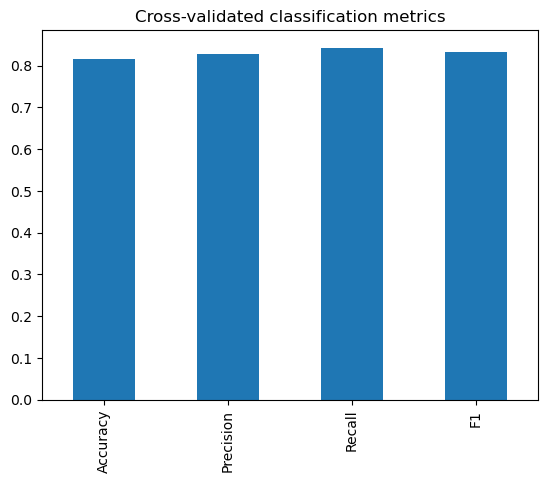

In [109]:
# Plot all of them together
scores = pd.DataFrame({'Accuracy':np.mean(cv_xgb_acc),
                       'Precision':np.mean(cv_xgb_precision),
                       'Recall':np.mean(cv_xgb_recall),
                       'F1':np.mean(cv_xgb_f1)},
                        index=[0])

scores.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);
print(scores)

In [112]:
# Find the predictions
model_xgb.fit(X_train,y_train)
y_preds = model_xgb.predict(X_test)

In [121]:
model_xgb.score(X_test,y_test)

0.8852459016393442

In [114]:
# Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



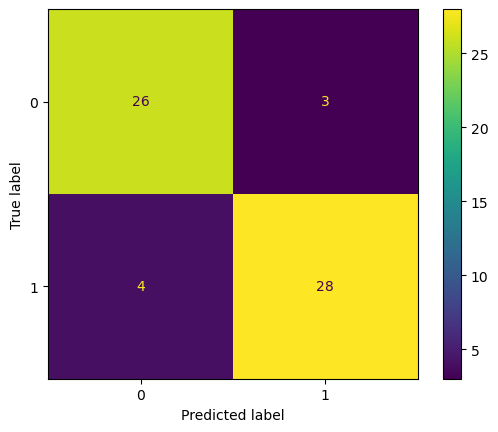

In [120]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

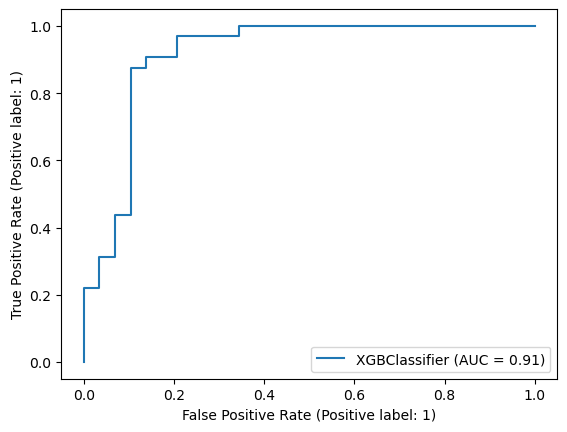

In [117]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test);

### Let's try to improve the model through feature engineering

In [433]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [385]:
# Combine cholesterol levels with maximum heart rate to find a ratio.
# This could indicate how cholesterol levels relate to heart rate during exercise.
df['chol/thalach'] = df.chol/df.thalach
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak_squared,thalach_squared,chol/thalach
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,5.29,22500,1.553333
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,12.25,34969,1.336898
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.96,29584,1.186047
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.64,31684,1.325843
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.36,26569,2.171779


In [437]:
# See the relationship between the number of blood vesels and the target
pd.crosstab(df.ca,df.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


In [444]:
# Let's try to create a feature that multiplies the number of vessels by the 'chol' (cholesterol) level, 
# hypothesizing that higher cholesterol levels in conjunction with more blocked vessels could be a 
# stronger indicator of heart disease.
df['ca_chol'] = df.ca*df.chol
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ca_chol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


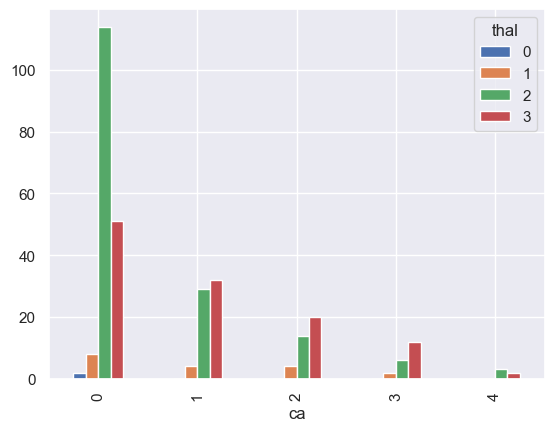

In [463]:
# Check the relationship between the blood vessels and the thalium stress
pd.crosstab(df.ca, df.thal).plot(kind='bar');

In [451]:
# exploring the relationship between the number of major blood vessels ('ca') and the thalium stress test results ('thal') 
# could provide useful insights for your heart disease classification model. 
# Thalium is a genetic disorder that affects hemoglobin production in the blood, 
# and stress test results can indicate the heart's ability to handle physical stress.
df['ca_thal'] = df.ca*df.thal
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ca_thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [389]:
# ST Depression per Resting Heart Rate:
# Calculate the ratio of ST depression to resting heart rate.
# This might help identify how stress during exercise relates to resting heart rate
df['oldpeak/trestbps'] = df.oldpeak/df.trestbps
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak_squared,thalach_squared,chol/thalach,oldpeak/trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,5.29,22500,1.553333,0.015862
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,12.25,34969,1.336898,0.026923
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.96,29584,1.186047,0.010769
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.64,31684,1.325843,0.006667
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.36,26569,2.171779,0.005000


In [458]:
# Now let's try to multiply the age with thalach to capture an age-heart rate interaction. 
# This might be relevant, as maximum heart rate might be more important for certain age groups.
df['age_thalach'] = df.age*df.thalach

In [457]:
# Ratio of Cholesterol to Resting Blood Pressure:
# Calculate the ratio of serum cholesterol to resting blood pressure. 
# This might capture certain patterns related to cardiovascular health.
df['chol/trestbps'] = df.chol/df.trestbps

In [468]:
X = df.drop('target', axis=1)
y = df.target

In [464]:
# Evaluate accuracy with cross validation
cv_acc_log_reg = cross_val_score(model_log_reg,
                                 X,
                                 y,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='accuracy')
cv_acc_log_reg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [466]:
np.mean(cv_acc_log_reg)

0.8479781420765027

In [465]:
# Evauate accuracy with cross validation
cv_acc_xgb = cross_val_score(model_xgb,
                                 X,
                                 y,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='accuracy')
cv_acc_xgb

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.7s finished


array([0.85245902, 0.85245902, 0.80327869, 0.75      , 0.78333333])

In [467]:
np.mean(cv_acc_xgb)

0.8083060109289617

## Conclusion

### After feature engineering, it can be seen that the model can be improved a bit but not a lot, as more data are needed in order to have substancial increase to our accuracy score. 

### It is then concluded that Logistic Regression is the best model with a cross validation accuracy of 85%. This shows that the evaluation accuracy needed of 95% was not achieved.